Tutorial 05

1. To find out a reasonable estimate for the background count in the given image.
You can use the features of the interactive plot in the matplotlib notebook environment, and find a region with low star counts. Try to do this for many regions, and find out if the values change considerably.

2. Estimate the distribution of the background counts in the given image.
As you can imagine, the background rates are more or less random. However, they do follow some probability distribution. Your task is to numerically plot this distribution. Try to use only the parts of the image not containing the cluster. To help you out with this (quite new) concept, we have defined a dummy function below that can help you out.

4. Try exploring the Astropy Table format (you can load ascii files with astropy.io.ascii much like we used fits here). We will come to this in a future tutorial, but it provides a way to deal with columns of different data types. Try to use this to replicate the previous assignments from Tutorials 1 and 3.

------------------------------------------------------------------------------------------------------------------------------------------------

Part 1

To find out a reasonable estimate for the background count in the given image. You can use the features of the interactive plot in the matplotlib notebook environment, and find a region with low star counts. Try to do this for many regions, and find out if the values change considerably.

In [2]:
from astropy.io import fits

In [3]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt

from astropy.stats import sigma_clipped_stats

In [4]:
m3_fits = fits.open('Messier3.fits')
m3_fits.info()

Filename: Messier3.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     115   (4096, 4108)   int16 (rescales to uint16)   


In [5]:
m3_data = m3_fits[0].data

In [6]:
print(m3_data.shape, m3_data.dtype)

(4108, 4096) uint16


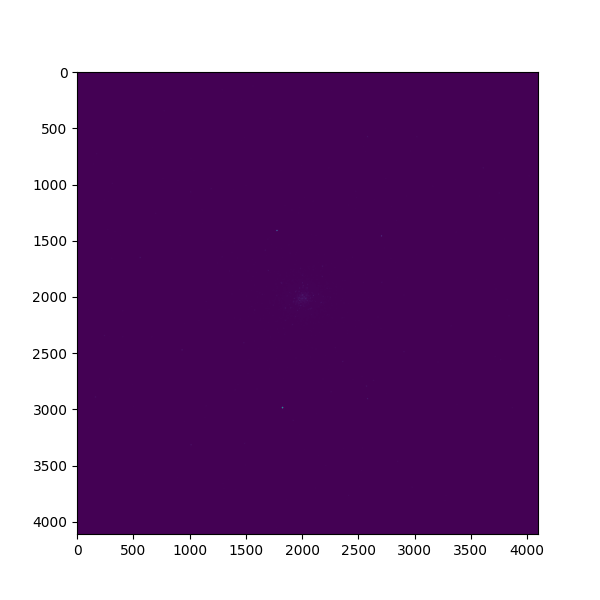

In [7]:
plt.figure(figsize=(6,6))
plt.imshow(m3_data)

In [8]:
mean, median, std = sigma_clipped_stats(m3_data)

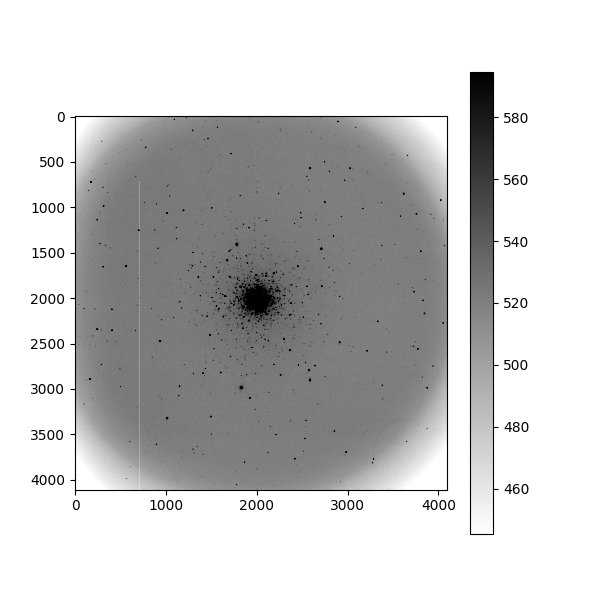

In [9]:
plt.figure(figsize=(6,6))

# set the scale of the image based on its statistics
# any pixel above vmax will show up with the same color as vmax. And vice-versa for vmin
plt.imshow(m3_data, vmin = median - 5*std, vmax = median + 5*std, cmap='binary')
plt.colorbar()

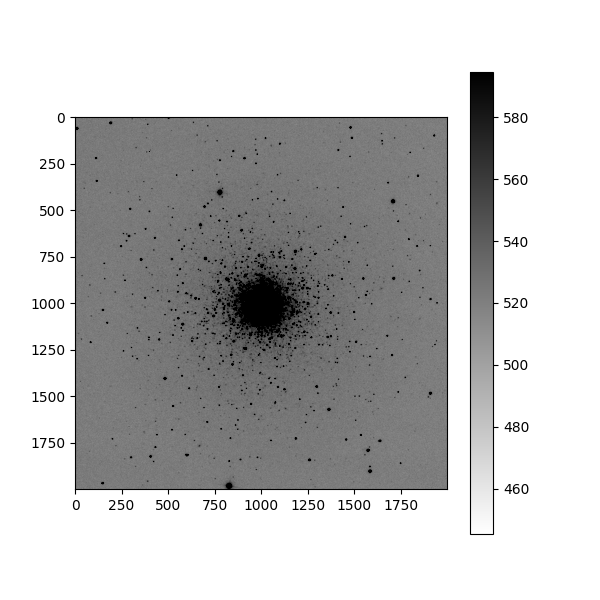

In [10]:
m3_data_zoomed = m3_data[1000:3000,1000:3000]
plt.figure(figsize=(6,6))

plt.imshow(m3_data_zoomed, vmin = median - 5*std, vmax = median + 5*std, cmap='binary')
plt.colorbar()

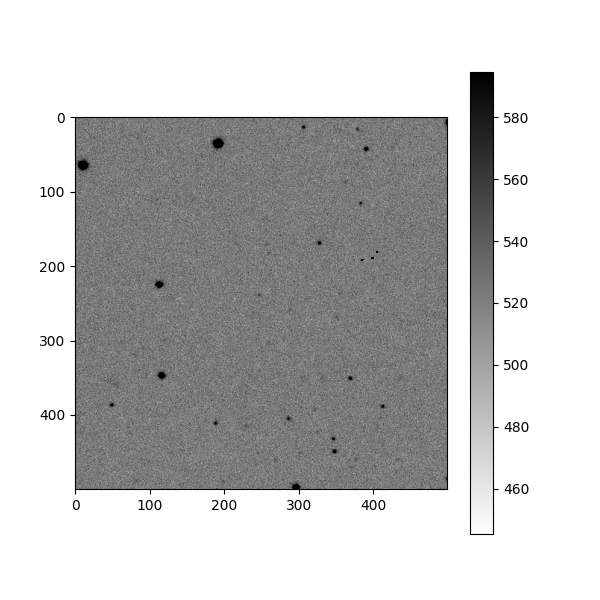

In [11]:
plt.figure(figsize=(6,6))

plt.imshow(m3_data_zoomed[0:500,0:500], vmin = median - 5*std, vmax = median + 5*std, cmap='binary')
plt.colorbar()

In [12]:
m3_background_count_1 = m3_data_zoomed[0:500,0:500]
mean, median, std = sigma_clipped_stats(m3_background_count_1, sigma=3.0)
print(m3_background_count_1)
#print(len(m3_background_count_1))
print(mean)
#print(median)

[[525 508 525 ... 541 533 537]
 [510 506 514 ... 561 507 547]
 [504 522 538 ... 531 541 525]
 ...
 [521 512 528 ... 510 540 539]
 [520 522 504 ... 517 529 523]
 [521 516 551 ... 526 512 524]]
523.3987972620071


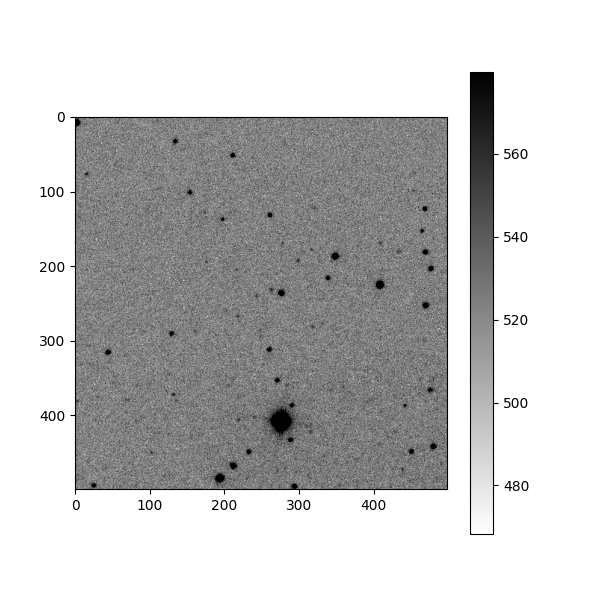

In [13]:
plt.figure(figsize=(6,6))

plt.imshow(m3_data_zoomed[0:500,501:1000], vmin = median - 5*std, vmax = median + 5*std, cmap='binary')
plt.colorbar()

In [14]:
m3_background_count_2 = m3_data_zoomed[0:500,501:1000]
mean, median, std = sigma_clipped_stats(m3_background_count_2, sigma=3.0)
print(m3_background_count_2)
#print(len(m3_background_count_2))
print(mean)
#print(median)

[[523 543 546 ... 509 507 525]
 [526 541 529 ... 529 532 540]
 [557 545 538 ... 532 489 515]
 ...
 [507 523 525 ... 531 540 561]
 [519 528 525 ... 514 518 529]
 [531 510 533 ... 509 513 545]]
524.351277952666


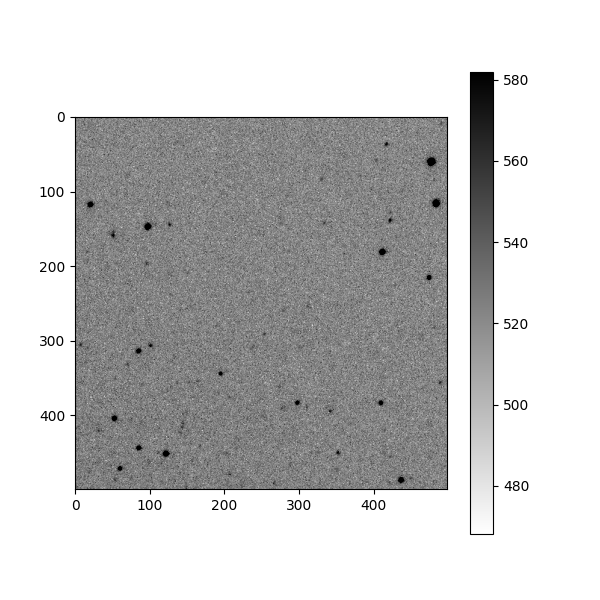

In [15]:
plt.figure(figsize=(6,6))

plt.imshow(m3_data_zoomed[0:500,1001:1500], vmin = median - 5*std, vmax = median + 5*std, cmap='binary')
plt.colorbar()

In [16]:
m3_background_count_3 = m3_data_zoomed[0:500,1001:1500]
mean, median, std = sigma_clipped_stats(m3_background_count_3, sigma=3.0)
print(m3_background_count_3)
#print(len(m3_background_count_3))
print(mean)
#print(median)

[[524 568 539 ... 505 517 545]
 [540 532 530 ... 512 522 533]
 [547 496 509 ... 512 521 525]
 ...
 [524 545 548 ... 544 528 517]
 [526 514 550 ... 533 528 528]
 [513 527 535 ... 507 520 526]]
523.6440638007284


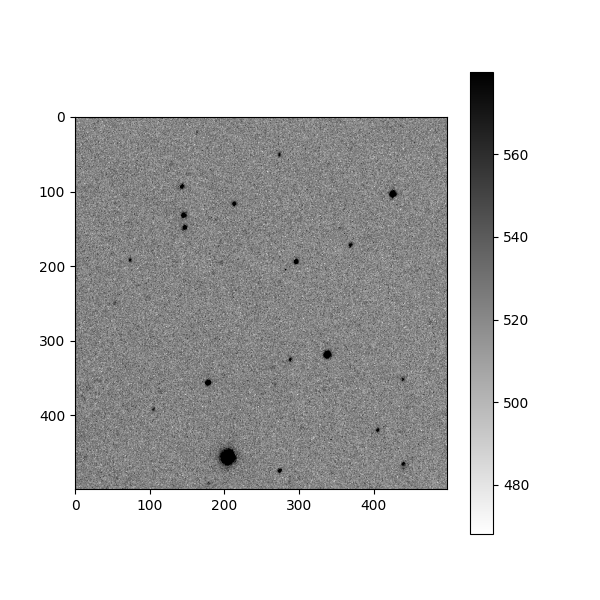

In [17]:
plt.figure(figsize=(6,6))

plt.imshow(m3_data_zoomed[0:500,1501:2000], vmin = median - 5*std, vmax = median + 5*std, cmap='binary')
plt.colorbar()

In [18]:
m3_background_count_4 = m3_data_zoomed[0:500,1501:2000]
mean, median, std = sigma_clipped_stats(m3_background_count_4, sigma=3.0)
print(m3_background_count_4)
#print(len(m3_background_count_4))
print(mean)
#print(median)

[[521 516 527 ... 521 513 512]
 [521 514 533 ... 506 519 520]
 [517 508 515 ... 514 522 521]
 ...
 [508 525 515 ... 531 504 510]
 [512 529 518 ... 530 536 506]
 [535 525 532 ... 503 525 529]]
521.7822244625022


In [19]:
m3_background_count_a = m3_data_zoomed[1250:1700,0:250]
mean, median, std = sigma_clipped_stats(m3_background_count_a)
print(m3_background_count_a)
#print(len(m3_background_count_a))
print(mean)
#print(median)

[[531 529 531 ... 520 536 511]
 [525 546 525 ... 510 530 515]
 [507 520 530 ... 516 537 510]
 ...
 [517 506 527 ... 539 539 517]
 [529 511 530 ... 534 509 500]
 [520 525 489 ... 559 516 509]]
522.4932843397091


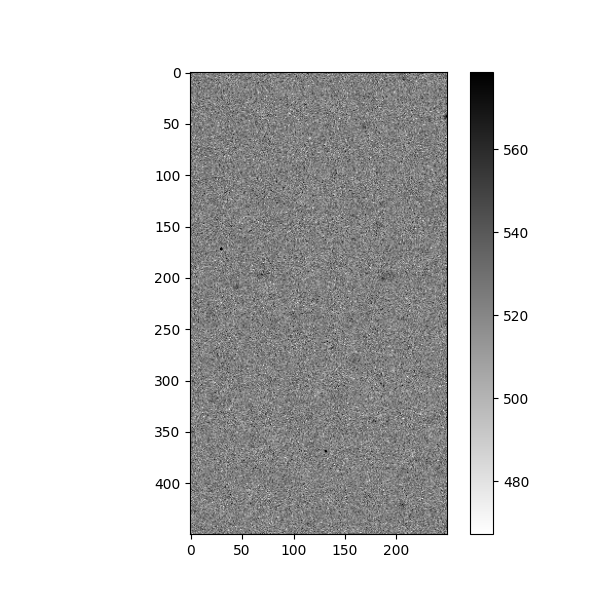

In [20]:
plt.figure(figsize=(6,6))

plt.imshow(m3_background_count_a, vmin = median - 5*std, vmax = median + 5*std, cmap='binary')
plt.colorbar()

In [21]:
m3_background_count_b = m3_data_zoomed[1550:2000,1760:2000]
mean, median, std = sigma_clipped_stats(m3_background_count_b)
print(m3_background_count_b)
#print(len(m3_background_count_b))
print(mean)
#print(median)

[[526 528 532 ... 521 530 519]
 [529 524 524 ... 531 527 524]
 [527 529 528 ... 533 509 516]
 ...
 [523 514 533 ... 516 508 515]
 [520 505 513 ... 514 523 516]
 [531 534 505 ... 513 529 554]]
521.0304484032356


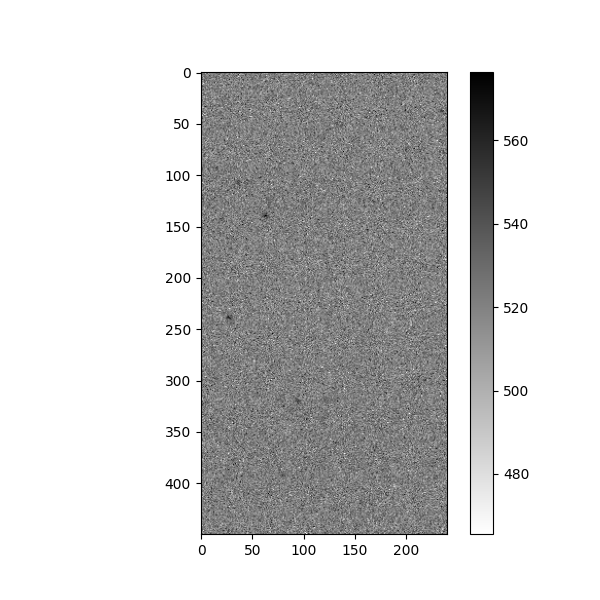

In [22]:
plt.figure(figsize=(6,6))

plt.imshow(m3_background_count_b, vmin = median - 5*std, vmax = median + 5*std, cmap='binary')
plt.colorbar()

In [23]:
m3_background_count_c = m3_data_zoomed[520:760,0:230]
mean, median, std = sigma_clipped_stats(m3_background_count_c)
print(m3_background_count_c)
#print(len(m3_background_count_c))
print(mean)
#print(median)

[[511 524 529 ... 538 527 506]
 [531 539 529 ... 543 517 519]
 [536 526 535 ... 519 509 521]
 ...
 [527 527 514 ... 531 517 515]
 [517 517 516 ... 514 508 505]
 [529 524 524 ... 514 510 490]]
523.2082371900524


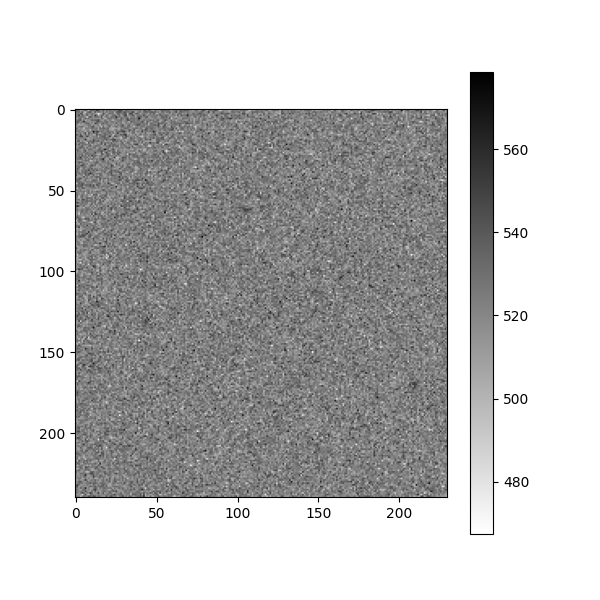

In [24]:
plt.figure(figsize=(6,6))

plt.imshow(m3_background_count_c, vmin = median - 5*std, vmax = median + 5*std, cmap='binary')
plt.colorbar()

In [25]:
m3_background_count_d = m3_data_zoomed[0:385,1200:1400]
mean, median, std = sigma_clipped_stats(m3_background_count_d)
print(m3_background_count_d)
#print(len(m3_background_count_d))
print(mean)
#print(median)

[[524 510 515 ... 519 521 518]
 [522 522 517 ... 508 529 538]
 [515 530 511 ... 519 523 516]
 ...
 [548 520 522 ... 505 527 530]
 [530 519 505 ... 514 510 528]
 [539 531 529 ... 501 536 514]]
523.0022574548509


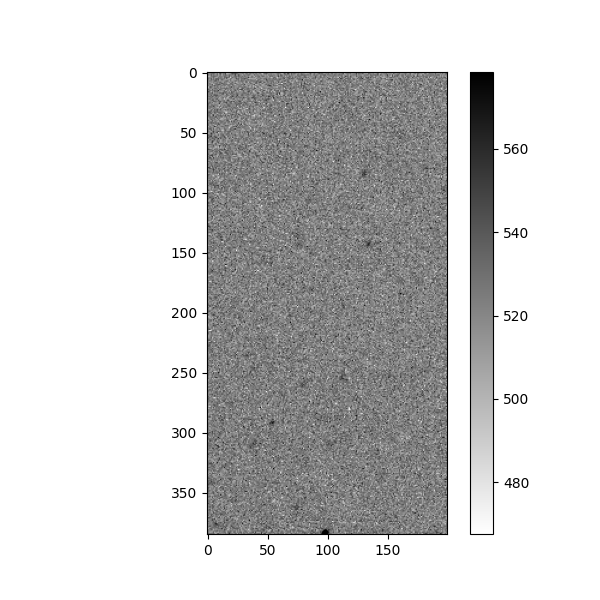

In [26]:
plt.figure(figsize=(6,6))

plt.imshow(m3_background_count_d, vmin = median - 5*std, vmax = median + 5*std, cmap='binary')
plt.colorbar()

---------------------------------------------------------------------------------------------------------------------------------------------

# Solution to Part 1: The reasonable estimate for background count is around 523.

---------------------------------------------------------------------------------------------------------------------------------------------

Part 2

Estimate the distribution of the background counts in the given image. As you can imagine, the background rates are more or less random. However, they do follow some probability distribution. Your task is to numerically plot this distribution. Try to use only the parts of the image not containing the cluster. To help you out with this (quite new) concept, we have defined a dummy function below that can help you out.

In [27]:
def get_background_histogram(array, min_count, max_count):
    """
        array is the numpy array that contains the counts for each pixel
        the bins for the histogram will be np.arange(min_count, max_count, 1)
    """
    flattened_array = array.flatten() # converts a multi-dimensional array into a one-dimensional array
    num_pixels, bin_edges = np.histogram(flattened_array, bins=np.arange(min_count, max_count, 1))
    bins = 0.5*(bin_edges[1:] + bin_edges[:-1])
    return bins, num_pixels

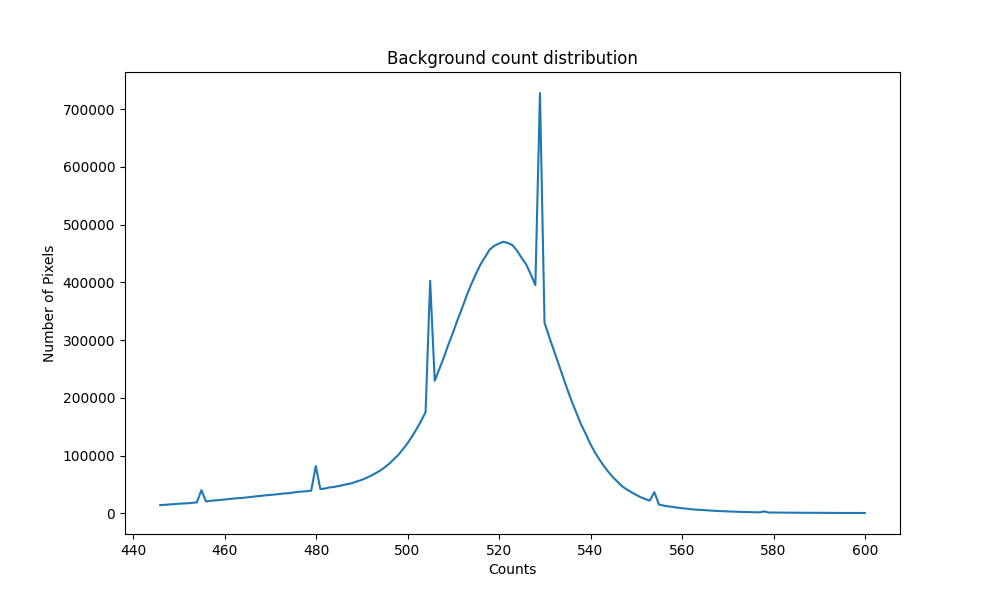

In [28]:
min_count = median - 7*std
max_count = median + 7*std

bins, num_pixels = get_background_histogram(m3_data, min_count, max_count)

plt.figure(figsize = (10,6))
plt.title("Background count distribution")
plt.xlabel('Counts')
plt.ylabel('Number of Pixels')
plt.plot(bins, num_pixels)

In [29]:
pixels_without_cluster = np.concatenate([m3_data[:1000, :], m3_data[3000:, :], m3_data[1000:3000, :1000], m3_data[1000:3000, 3000:]], axis=None)
# Use the first image to calculate the ranges in order to exclude the cluster

In [30]:
bkg_mean, bkg_median, bkg_std = sigma_clipped_stats(pixels_without_cluster)

In [31]:
min_count = bkg_median - 5*bkg_std
max_count = bkg_median + 5*bkg_std
bins_bkg, num_pixels_bkg = get_background_histogram(pixels_without_cluster, min_count, max_count)

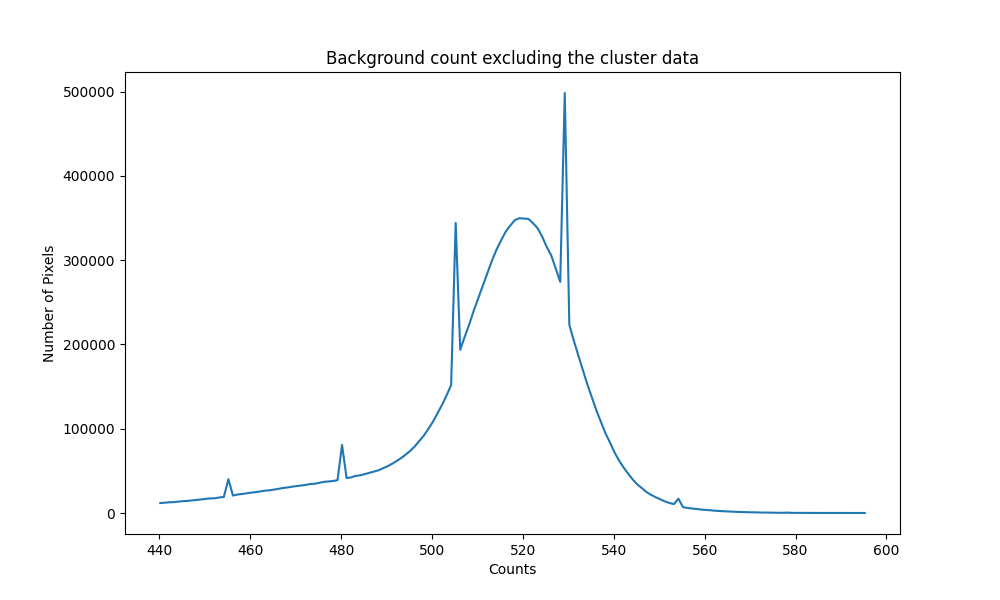

In [32]:
plt.figure(figsize = (10,6))
plt.title("Background count excluding the cluster data")
plt.xlabel('Counts')
plt.ylabel('Number of Pixels')

plt.plot(bins_bkg, num_pixels_bkg)

### Since the spikes are common for both datasets, it is clear that the source of the spikes is not the cluster.

---------------------------------------------------------------------------------------------------------------------------------------------

Part 3

Try exploring the Astropy Table format (you can load ascii files with astropy.io.ascii much like we used fits here). We will come to this in a future tutorial, but it provides a way to deal with columns of different data types. Try to use this to replicate the previous assignments from Tutorials 1 and 3.

In [33]:
import astropy.io.ascii as ascii

---------------------------------------------------------------------------------------------------------------------------------------------

### Solutions to Tutorial 01

#### Part 1

In [44]:
moons_and_planets_data = ascii.read('Moons_and_planets.csv')

print(moons_and_planets_data)

Name of Moon Name of Planet Diameter (km)
------------ -------------- -------------
        Moon          Earth        1737.1
      Phobos           Mars          11.1
      Deimos           Mars           6.2
          Io        Jupiter        1818.1
      Europa        Jupiter        1560.7
    Ganymede        Jupiter        2634.1
    Callisto        Jupiter        2408.4
    Amalthea        Jupiter          83.5
     Himalia        Jupiter          67.0
       Elara        Jupiter          43.0
    Pasiphae        Jupiter          30.0
      Sinope        Jupiter          19.0
    Lysithea        Jupiter          18.0
         ...            ...           ...
     Larissa        Neptune          97.0
     Proteus        Neptune         210.0
    Halimede        Neptune          31.0
    Psamathe        Neptune          20.0
         Sao        Neptune          22.0
   Laomedeia        Neptune          21.0
        Neso        Neptune          30.0
   Hippocamp        Neptune       

In [45]:
column_dtype = moons_and_planets_data['Diameter (km)'].dtype

print(column_dtype)

float64


In [52]:
def moons_num():
    count = 0
    for planet in moons_and_planets_data['Name of Planet']:
        if planet == 'Jupiter':
            count = count + 1
    return count
    
earth_moons_num = moons_num()
print(f'The number of moon for Earth is', earth_moons_num)

The number of moon for Earth is 79


#### Part 2

In [ ]:
moons_and_planets_data.sort('Diameter (km)')

# Write the sorted data to a new file in CSV format
ascii.write(moons_and_planets_data, 'sorted_data.csv', format='csv', overwrite=True)

---------------------------------------------------------------------------------------------------------------------------------------------

#### The problem with the sorting was that the 'sorted_data' variable was assigned to the sorting. In Astropy's Table.sort(), the sorting happens in place, meaning it modifies the original table rather than returning a new sorted table. So, when you try to assign sorted_data = data.sort('float_column'), the variable sorted_data may actually be None, which would explain why sorted_data.csv is empty.

---------------------------------------------------------------------------------------------------------------------------------------------

### Solutions to Tutorial 02

#### Part 1

Part 1 is the same as previous tutorial

---------------------------------------------------------------------------------------------------------------------------------------------

#### Part 2

In [57]:
beehive_data = ascii.read('Beehive_data.csv')
print(beehive_data)

 Vmag  logL  prob
----- ----- -----
  6.3  1.77 100.0
 6.39  1.85 100.0
 6.44  1.85 100.0
 6.59  1.76 100.0
 6.61  1.72  35.0
 6.61  1.72  47.0
 6.61  1.72  17.0
 6.67  1.62 100.0
 6.78  1.57 100.0
 6.78  1.58 100.0
 6.85  1.55 100.0
  6.9  1.64 100.0
 7.32  1.36 100.0
  ...   ...   ...
 12.2 -0.49 100.0
12.36 -0.55   0.0
12.43 -0.56 100.0
12.53  -0.6 100.0
12.63 -0.62 100.0
12.64 -0.61 100.0
12.68 -0.61 100.0
12.74 -0.66 100.0
12.83  -0.7   0.0
13.13 -0.78 100.0
 13.2  -0.8 100.0
 13.7 -1.11   0.0
13.97 -0.94 100.0
Length = 104 rows


In [81]:
def high_prob_obj(beehive_data):
    high_prob_objects = beehive_data[beehive_data['prob'] >= 50.0]
    
    ascii.write(high_prob_objects, 'high_prob_objects.csv', format='csv', overwrite=True)

    return high_prob_objects
    
high_prob = high_prob_obj(beehive_data)
print(high_prob)

 Vmag  logL  prob
----- ----- -----
  6.3  1.77 100.0
 6.39  1.85 100.0
 6.44  1.85 100.0
 6.59  1.76 100.0
 6.67  1.62 100.0
 6.78  1.57 100.0
 6.78  1.58 100.0
 6.85  1.55 100.0
  6.9  1.64 100.0
 7.32  1.36 100.0
 7.45  1.31 100.0
 7.54  1.27 100.0
 7.73   1.2 100.0
  ...   ...   ...
12.09 -0.46 100.0
12.12 -0.41 100.0
12.17 -0.48 100.0
 12.2 -0.49 100.0
12.43 -0.56 100.0
12.53  -0.6 100.0
12.63 -0.62 100.0
12.64 -0.61 100.0
12.68 -0.61 100.0
12.74 -0.66 100.0
13.13 -0.78 100.0
 13.2  -0.8 100.0
13.97 -0.94 100.0
Length = 79 rows


In [83]:
def log(log_value):
    lum = 10**log_value
    return lum

lum_data = log(high_prob['logL'])
print(lum_data)

        logL       
-------------------
   58.8843655355589
  70.79457843841381
  70.79457843841381
 57.543993733715695
  41.68693834703355
  37.15352290971726
 38.018939632056124
  35.48133892335755
  43.65158322401658
 22.908676527677734
 20.417379446695296
 18.620871366628677
 15.848931924611133
                ...
 0.3467368504525316
 0.3890451449942806
 0.3311311214825911
0.32359365692962827
 0.2754228703338166
  0.251188643150958
0.23988329190194904
0.24547089156850305
0.24547089156850305
0.21877616239495523
0.16595869074375605
0.15848931924611134
 0.1148153621496883
Length = 79 rows


In [86]:
high_prob['Luminosity'] = lum_data
high_prob.pprint()

 Vmag  logL  prob      Luminosity    
----- ----- ----- -------------------
  6.3  1.77 100.0    58.8843655355589
 6.39  1.85 100.0   70.79457843841381
 6.44  1.85 100.0   70.79457843841381
 6.59  1.76 100.0  57.543993733715695
 6.67  1.62 100.0   41.68693834703355
 6.78  1.57 100.0   37.15352290971726
 6.78  1.58 100.0  38.018939632056124
 6.85  1.55 100.0   35.48133892335755
  6.9  1.64 100.0   43.65158322401658
 7.32  1.36 100.0  22.908676527677734
 7.45  1.31 100.0  20.417379446695296
 7.54  1.27 100.0  18.620871366628677
 7.73   1.2 100.0  15.848931924611133
  ...   ...   ...                 ...
12.09 -0.46 100.0  0.3467368504525316
12.12 -0.41 100.0  0.3890451449942806
12.17 -0.48 100.0  0.3311311214825911
 12.2 -0.49 100.0 0.32359365692962827
12.43 -0.56 100.0  0.2754228703338166
12.53  -0.6 100.0   0.251188643150958
12.63 -0.62 100.0 0.23988329190194904
12.64 -0.61 100.0 0.24547089156850305
12.68 -0.61 100.0 0.24547089156850305
12.74 -0.66 100.0 0.21877616239495523
13.13 -0.78 

In [ ]:
def flux():
    f = 